In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# What is Template Matching

در گام اول ما یک تصویر انتخاب میکنیم  برای تصویر اصلی و تصویر هدف را از تصویر اصلی کراپ میکنیم
سپس برای سادگی و بهینه سازی عکس را به عکس سیاه سفید تبدیل میکنیم 
بعد عکس هدف را در عکس اصلی غلتش میدهیم و در هر گام غلتش ۲ عکس را تبدیل به بردار میکنیم و سپس شباهت کسینوسی بین ۲ بردار را محاسبه میکنیم و کسینوس هر چقدر بیشتر به معنای  شباهت بیشتر هست 
و مکان جایی که کسینوس بیشترین مقدار خود شد را به اندازه سایز عکس تارگت یه مربع میکشیم  

In [2]:
complete_image = Image.open("Images/Ronaldo_bycicle_goal.jpg").convert("L") # open any Image as your complete image in gray scale
target_image = Image.open("Images/ball.png").convert("L") # crop any place of image as your target image in gray scale
#convert images to matrix
complete_image_matrix = np.array(complete_image) 
target_image_matrix = np.array(target_image)

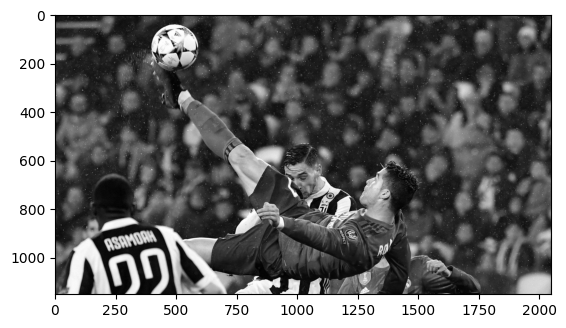

In [3]:
#plot original image
plt.imshow(complete_image  , cmap="gray")


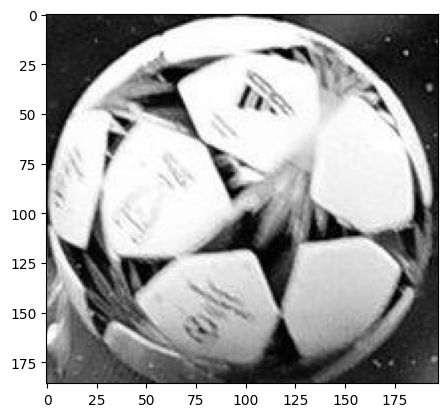

In [4]:
#plot target image
plt.imshow(target_image , cmap="gray")

Normalize array to have 0 mean and 1 variance 

In [5]:
def normalize(arr):
    return (arr - np.mean(arr)) / (np.std(arr) + 1e-8)

In [ ]:
def template_match(image, target):

    img_h, img_w = image.shape
    tpl_h, tpl_w = target.shape

    # Normalize template and convert matrix to vector with .ravel
    template_norm = normalize(target).ravel()
    # create score map with proper shape full of zero . we will change every entry of matrix when we slide target matrix over original image
    score_map = np.zeros((img_h - tpl_h + 1, img_w - tpl_w + 1)) 

    # slide the template over the image
    for i in range(score_map.shape[0]):
        for j in range(score_map.shape[1]):
            patch = image[i:i+tpl_h, j:j+tpl_w] 
            patch_norm = normalize(patch).ravel()
            score = np.dot(patch_norm , template_norm)
            score_map[i, j] = score

    return score_map


Draw a rectangle on the image around the match location.

In [ ]:
def draw_match_box(image, top_left, target_shape):
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')
    rect = patches.Rectangle(top_left,
                             target_shape[1],  # width
                             target_shape[0],  # height
                             linewidth=2,
                             edgecolor='red',
                             facecolor='none')
    ax.add_patch(rect)
    plt.title(f"Match at {top_left}")
    plt.axis('off')
    plt.show()

Depend on size of your image and using CPU or GPU it is going to take a while . for me it takes 6 min 

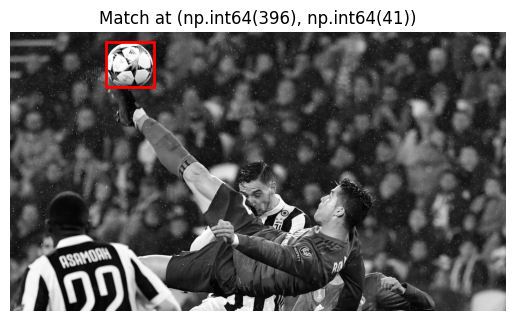

In [8]:


# Perform NCC matching
score = template_match(complete_image_matrix, target_image_matrix)

# Find best match 
match_y, match_x = np.unravel_index(np.argmax(score), score.shape)

# Draw rectangle around match in grayscale image
draw_match_box(complete_image_matrix, (match_x, match_y), target_image_matrix.shape)

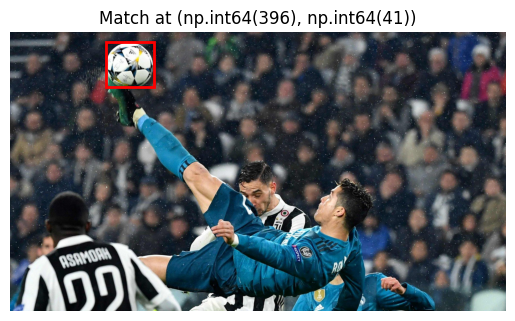

In [9]:
# draw rectanlgle match in RGB image
colored_image = Image.open("Images/Ronaldo_bycicle_goal.jpg")
draw_match_box(colored_image, (match_x, match_y), target_image_matrix.shape)